<img src = "https://escp.eu/sites/default/files/logo/ESCP-logo-white-misalign.svg" width = 400 style="background-color: #240085;">
<h1 align=center><font size = 6>ESCP Business School</font></h1>
<h3 align=center><font size = 5>SCOR Datathon</font><br/>
<font size = 3>The Data Science Challenge Bridging Indian Agricultureal Protection Gap</font></h3>
<h6 align=center>Chapter 2A - Preprocessing</h6>

Last Updated: December 20, 2021\
Author: Group 21 - Anniek Brink, Jeanne Dubois, and Resha Dirga

<h3>Chapter Objectives</h3>

<p>In this chapter the merged datasets will be processed based on the findings and next steps in Data Exploratory chapter. At the end of this chapter, the dataset should be ready to be used for clustering. The treatment will focus on data imputation to fill the missing values on Premium for insurance columns and Production yield columns.</p>

<p>In addition to the three items above, the best granularity level for analysis shall be determined during Data Imputation to get the best result possible.</p>

<h3>Chapter 1: Import modules</h3>
<p>This chapter lists all modules that being used on this document. The module import process will be performed on this chapter</p>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
import statistics

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

<h3>Chapter 2: Read datasets</h3>
<p>This chapter reads the merged datasets and provides a quick overview of each datasets, i.e.: the first five line of each dataset, information of the data types and the summary of all numerical values.</p>

<h5>Chapter 2.1 - Read merged datasets</h5>

In [2]:
# List of file directories
merged_filenames = [
    "datasets_merged/df_kharif_merged_full.csv",
    "datasets_merged/df_rabi_merged_full.csv"
]

In [3]:
# Store datasets in a dataframe
df = {}
for filename in merged_filenames:
    df[filename] = pd.read_csv(filename, delimiter=";",index_col = 0)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Create a function for indexing the specific dataset
def df_shorten(season):
    if  season == "kharif":
        return df[list(df.keys())[0]]
    elif season == "rabi":
        return df[list(df.keys())[1]]
    else:
        print("Data is out of range. Available season data: kharif, rabi (case sensitive)")
        return

<h5>Chapter 2.2 - Dataset overview</h5>

In [5]:
# Setup viewing parameter for dataset overview
pd.set_option('display.max_columns', None)

In [6]:
# Print datasets info
for index in merged_filenames:
    print('')
    print(index)
    print('----------')
    df[index].info()
    print('<<=====================>>')


datasets_merged/df_kharif_merged_full.csv
----------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 511242 entries, 0 to 511241
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               511242 non-null  object 
 1   Cluster             511242 non-null  int64  
 2   District            511242 non-null  object 
 3   Sub-District        429814 non-null  object 
 4   Block               365178 non-null  object 
 5   GP                  374588 non-null  object 
 6   Season              511242 non-null  object 
 7   Crop                511242 non-null  object 
 8   Area Sown (Ha)      235991 non-null  float64
 9   Area Insured (Ha)   457488 non-null  float64
 10  SI Per Ha (Inr/Ha)  483683 non-null  float64
 11  Sum Insured (Inr)   374695 non-null  float64
 12  Indemnity Level     511242 non-null  float64
 13  2000 Yield          13682 non-null   float64
 14  2001 Yield          13664 non-

In [7]:
# Print datasets first five lines
for index in merged_filenames:
    print('')
    print(index)
    print('----------')
    print(df[index].head())
    print('<<=====================>>')


datasets_merged/df_kharif_merged_full.csv
----------
            State  Cluster   District Sub-District Block                   GP  \
0  andhra pradesh        1  anantapur        agali   NaN                agali   
1  andhra pradesh        1  anantapur        agali   NaN  akkagaladevarahalli   
2  andhra pradesh        1  anantapur        agali   NaN  hulikeradevarahalli   
3  andhra pradesh        1  anantapur        agali   NaN            inagalore   
4  andhra pradesh        1  anantapur        agali   NaN            kodihalli   

   Season   Crop  Area Sown (Ha)  Area Insured (Ha)  SI Per Ha (Inr/Ha)  \
0  kharif  arhar       40.623418           0.168514             28750.0   
1  kharif  arhar       40.623418           0.168514             28750.0   
2  kharif  arhar       40.623418           0.168514             28750.0   
3  kharif  arhar       40.623418           0.168514             28750.0   
4  kharif  arhar       40.623418           0.168514             28750.0   

   Sum I

In [8]:
# Print datasets summary for numerical columns
for index in merged_filenames:
    print('')
    print(index)
    print('----------')
    print(df[index].describe())
    print('<<=====================>>')


datasets_merged/df_kharif_merged_full.csv
----------
             Cluster  Area Sown (Ha)  Area Insured (Ha)  SI Per Ha (Inr/Ha)  \
count  511242.000000   235991.000000      457488.000000       483683.000000   
mean        4.812815      414.274412         150.941875        38769.584908   
std         2.889222     1188.494481         655.212038        21618.881634   
min         1.000000        0.000000           0.000000         1400.000000   
25%         2.000000       78.093023           1.404914        20524.000000   
50%         4.000000      170.689798          34.188941        36000.000000   
75%         7.000000      376.251451         147.058824        51686.000000   
max        12.000000    85824.000000       85300.000000       250000.000000   

       Sum Insured (Inr)  Indemnity Level    2000 Yield    2001 Yield  \
count       3.746950e+05    511242.000000  13682.000000  13664.000000   
mean        1.015820e+07         0.810371   1547.075772   2334.428377   
std         4.4

<h3>Chapter 3: Data Imputation</h3>
<p>High-level observation in Data Exploratory indicates that only 'States', 'District', 'Season', 'Crop' and 'Indemnity Level' that consistently has 0 null-values across the files. Data imputation will be performed accordingly to columns with null-values based on the next step conclusion during Data Exploratory. The data imputation follows the four categorisation of columns defined in Data Exploratory, i.e.:
    <ul>
        <li>Administrative level: 'State', 'Cluster', 'District', 'Sub-District', 'Block', 'GP'</li>
        <li>Season and type of crops: 'Season', 'Crop'</li>
        <li>Premium for insurance: 'Area Sown (Ha)', 'Area Insured (Ha)', 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)', 'Indemnity Level'</li>
        <li>Production yield: '20xx Yield'</li>
    </ul>
Refering to the next step, data imputation will only be performed on <b>Premium for insurance columns</b> and <b>Production yield columns</b>.
</p>

In [9]:
# Create function to check null-values
def check_null(data):
    try:
        sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
    except:
        pass
    
    df_check_null = {
    'Null': data.isna().sum(),
    'Non-null': data.count(),
    }
    
    return pd.DataFrame(df_check_null).transpose()

In [10]:
# Define columns based on categories
cols_administrative = ['State', 'Cluster', 'District', 'Sub-District', 'Block', 'GP']
cols_season_and_crops = ['Season', 'Crop']
cols_insurances = ['Area Sown (Ha)', 'Area Insured (Ha)', 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)', 'Indemnity Level']
cols_production = ['13:'] # The production year available on each files are different.

<h5>Chapter 3.1 - Data Imputation for Premium for insurance columns</h5>
<p>Quoting the next step for the columns from Data Exploratory:
    <i>
        <p>The columns that are crucial for the clustering are 'Area Insured (Ha)', 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)' and 'Indemnity Level' since those values will be used to determine the 'Threshold Yield' and 'Loss Calculation'. <b>To  fill the missing values, the following formula will be utilised</b>:
<h5 align='center'> 'Sum Insured (Inr)' = 'Area Insured (Ha)' * 'SI Per Ha (Inr/Ha)' </h5>
<br/>
<p>The formula however can only be used if there is only one missing value among the three. In case there are more than 2 parameters missing, the data might be imputed by <b>cross-referencing data from other record within the same district group</b>.</p>
    </i>
</p>

<b><i>3.1.1 - Data Imputation using Formula for one missing value</i></b>

In [11]:
# Create functions containing formula for one missing value
def fill_sum_insured(sum_insured, area_insured, si_per_ha):
    if pd.isnull(sum_insured):
        try:
            return (area_insured*si_per_ha)
        except:
            pass
    else:
        return sum_insured

def fill_area_insured(sum_insured, area_insured, si_per_ha):
    if pd.isnull(area_insured):
        try:
            return (sum_insured/si_per_ha)
        except:
            pass
    else:
        return area_insured
    
def fill_si_per_ha(sum_insured, area_insured, si_per_ha):
    if pd.isnull(si_per_ha):
        try:
            return (sum_insured/area_insured)
        except:
            pass
    else:
        return si_per_ha

In [12]:
# Create function to impute null using formula
def impute_null_in_premium_with_formulas(season):
    duplicate = {
        'a': df_shorten(season)['Sum Insured (Inr)'],
        'b': df_shorten(season)['Area Insured (Ha)'],
        'c': df_shorten(season)['SI Per Ha (Inr/Ha)']
    }

    df_duplicate = pd.DataFrame(duplicate)

    df_duplicate['a'] = df_duplicate.apply(lambda x: fill_sum_insured(x.a, x.b, x.c), axis=1)
    df_duplicate['b'] = df_duplicate.apply(lambda x: fill_area_insured(x.a, x.b, x.c), axis=1)
    df_duplicate['c'] = df_duplicate.apply(lambda x: fill_si_per_ha(x.a, x.b, x.c), axis=1)
    
    return df_duplicate

,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level
Null,275251,48225,27559,20669,0
Non-null,235991,463017,483683,490573,511242


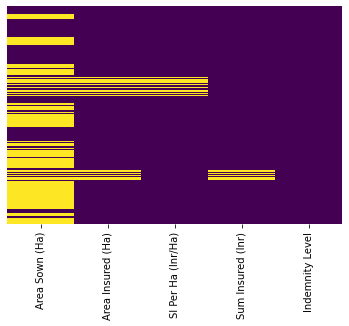

In [13]:
# Impute data for Kharif dataset
imputed_values = impute_null_in_premium_with_formulas("kharif")

df_shorten("kharif")['Sum Insured (Inr)'] = imputed_values['a']
df_shorten("kharif")['Area Insured (Ha)'] = imputed_values['b']
df_shorten("kharif")['SI Per Ha (Inr/Ha)'] = imputed_values['c']

check_null(df_shorten("kharif")[cols_insurances])

,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level
Null,372578,5126,323,5284,0
Non-null,244213,611665,616468,611507,616791


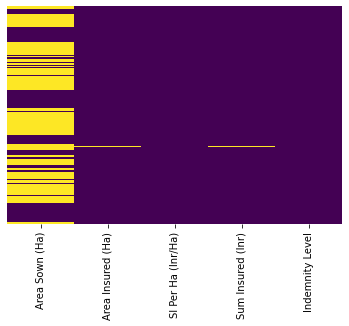

In [14]:
# Impute data for Kharif dataset
imputed_values = impute_null_in_premium_with_formulas("rabi")

df_shorten("rabi")['Sum Insured (Inr)'] = imputed_values['a']
df_shorten("rabi")['Area Insured (Ha)'] = imputed_values['b']
df_shorten("rabi")['SI Per Ha (Inr/Ha)'] = imputed_values['c']

check_null(df_shorten("rabi")[cols_insurances])

<p>After the imputation using formula, there are still some data points missing. To impute the remaining null values, it can be performed by cross-referencing data from other year version of dataset depending on the consistency of column values accross years, or taking a statistical approach after calculation formula implemented.</p>
<p>In deciding the approach to impute the remaining value, the following is the summary of null-values remaining:</p>

,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level,on_null
Null,48106,48225,27558,20668,0,kharif_Area Insured (Ha)
Non-null,119,0,20667,27557,48225,kharif_Area Insured (Ha)
Null,27559,27558,27559,2,0,kharif_SI Per Ha (Inr/Ha)
Non-null,0,1,0,27557,27559,kharif_SI Per Ha (Inr/Ha)
Null,20550,20668,2,20669,0,kharif_Sum Insured (Inr)
Non-null,119,1,20667,0,20669,kharif_Sum Insured (Inr)
Null,4565,5126,165,5126,0,rabi_Area Insured (Ha)
Non-null,561,0,4961,0,5126,rabi_Area Insured (Ha)
Null,289,165,323,323,0,rabi_SI Per Ha (Inr/Ha)
Non-null,34,158,0,0,323,rabi_SI Per Ha (Inr/Ha)


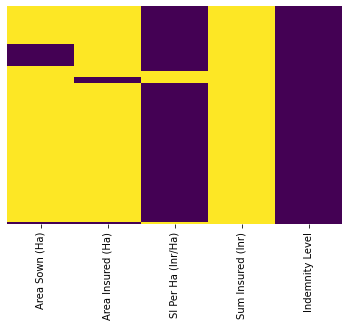

In [15]:
# Check the remaining null_values
df_summary = pd.DataFrame()

for season in ["kharif", "rabi"]:
    for col in ['Area Insured (Ha)', 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)']:
        df_checked = check_null(df_shorten(season)[df_shorten(season)[col].isnull()][cols_insurances])
        df_checked['on_null'] = season +'_'+ col
        df_summary = pd.concat([df_summary, df_checked], axis=0)
            
df_summary

<p>From the table above, the null-values mainly caused by null-values in 'Area Insured (Ha)'. Also, for these data the null-values on 'Area Sown (Ha)' column is often found null. Thus, the following <u><b>assumption</b></u> can be derived to justify null-values on Premium for insurance columns:
    <ul>
        <li>If 'Area Insured (Ha)' is null and 'SI Per Ha (Inr/Ha)' is non-null, then the area is not insured</li>
        <li>If 'Area Insured (Ha)' is null and 'Area Sown (Ha)' is null, then the area is not sown</li>
    </ul>
These assumptions can be concluded by observing the null and non-null values when 'Sum Insured (Inr)' columns are on null. Applying this logic to the dataset, the remaining null-values that are not justified by the assumptions ('Area Insured (Ha)' is non-null when 'Sum Insured (Inr)' is null):
<ul>
    <li>1 null data points on Kharif dataset</li>
    <li>158 null data points on Rabi dataset</li>
</ul></p>

<b><i>3.1.2 - Data Imputation by cross-referencing data from other record within the same district group</i></b>

In [16]:
# Create function to create identifiers and district group
def create_ID(season):
    return df_shorten(season).index.to_series().map(str)

def create_GP_group(season):
    return df_shorten(season)['State'].map(str) + '|' + df_shorten(season)['District'].map(str) + '|' + df_shorten(season)['Sub-District'].map(str) + '|' + df_shorten(season)['Block'].map(str) + '|' + df_shorten(season)['GP'].map(str) + '|' + df_shorten(season)['Crop'].map(str)

def create_district_group(season):
    return df_shorten(season)['State'].map(str) + '|' + df_shorten(season)['District'].map(str) + '|' + df_shorten(season)['Crop'].map(str)

In [17]:
# For each dataset, assign a data points identifiers and district groups
for season in ['kharif', 'rabi']:
#   Standardise cases of identifiers
    for col in ['State', 'District', 'Sub-District', 'Block', 'GP', 'Crop']:
        df_shorten(season)[col] = df_shorten(season)[col].str.lower()

    df_shorten(season)['ID'] = create_ID(season)
    df_shorten(season)['GP_Group'] = create_GP_group(season)
    df_shorten(season)['District_Group'] = create_district_group(season)

In [18]:
df_shorten("kharif")

,State,Cluster,District,Sub-District,Block,GP,Season,Crop,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level,2000 Yield,2001 Yield,2002 Yield,2003 Yield,2004 Yield,2005 Yield,2006 Yield,2007 Yield,2008 Yield,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2017 Yield,2018 Yield,ID,GP_Group,District_Group
0,andhra pradesh,1,anantapur,agali,NaN,agali,kharif,arhar,40.623418,0.168514,28750.0,4844.772967,0.8,NaN,NaN,NaN,NaN,NaN,NaN,141.792547,463.99375,343.818182,264.534667,150.820333,87.096222,108.775,70.00,295.00,89.00,99.0,NaN,NaN,0,andhra pradesh|anantapur|agali|nan|agali|arhar,andhra pradesh|anantapur|arhar
1,andhra pradesh,1,anantapur,agali,NaN,akkagaladevarahalli,kharif,arhar,40.623418,0.168514,28750.0,4844.772967,0.8,NaN,NaN,NaN,NaN,NaN,NaN,141.792547,463.99375,343.818182,264.534667,150.820333,87.096222,108.775,58.00,232.00,120.00,99.0,NaN,NaN,1,andhra pradesh|anantapur|agali|nan|akkagaladev...,andhra pradesh|anantapur|arhar
2,andhra pradesh,1,anantapur,agali,NaN,hulikeradevarahalli,kharif,arhar,40.623418,0.168514,28750.0,4844.772967,0.8,NaN,NaN,NaN,NaN,NaN,NaN,141.792547,463.99375,343.818182,264.534667,150.820333,87.096222,108.775,67.00,295.00,89.00,99.0,NaN,NaN,2,andhra pradesh|anantapur|agali|nan|hulikeradev...,andhra pradesh|anantapur|arhar
3,andhra pradesh,1,anantapur,agali,NaN,inagalore,kharif,arhar,40.623418,0.168514,28750.0,4844.772967,0.8,NaN,NaN,NaN,NaN,NaN,NaN,141.792547,463.99375,343.818182,264.534667,150.820333,87.096222,108.775,62.00,232.00,120.00,99.0,NaN,NaN,3,andhra pradesh|anantapur|agali|nan|inagalore|a...,andhra pradesh|anantapur|arhar
4,andhra pradesh,1,anantapur,agali,NaN,kodihalli,kharif,arhar,40.623418,0.168514,28750.0,4844.772967,0.8,NaN,NaN,NaN,NaN,NaN,NaN,141.792547,463.99375,343.818182,264.534667,150.820333,87.096222,108.775,70.00,295.00,89.00,99.0,NaN,NaN,4,andhra pradesh|anantapur|agali|nan|kodihalli|a...,andhra pradesh|anantapur|arhar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511237,west bengal,2,uttar dinajpur,NaN,hemtabad,NaN,kharif,aus paddy,NaN,1.857143,60500.0,112357.142857,0.9,NaN,NaN,NaN,NaN,NaN,1591.45,1223.840000,1533.26000,1657.400000,1479.010000,1814.600000,1748.970000,1781.370,1942.86,2086.49,2346.79,NaN,NaN,NaN,511237,west bengal|uttar dinajpur|nan|hemtabad|nan|au...,west bengal|uttar dinajpur|aus paddy
511238,west bengal,2,uttar dinajpur,NaN,itahar,NaN,kharif,aus paddy,NaN,1.857143,60500.0,112357.142857,0.9,NaN,NaN,NaN,NaN,NaN,1591.45,1223.840000,1533.26000,1657.400000,1479.010000,1814.600000,1748.970000,1781.370,1942.86,2086.49,2346.79,NaN,NaN,NaN,511238,west bengal|uttar dinajpur|nan|itahar|nan|aus ...,west bengal|uttar dinajpur|aus paddy
511239,west bengal,2,uttar dinajpur,NaN,kaliaganj,NaN,kharif,aus paddy,NaN,1.857143,60500.0,112357.142857,0.9,NaN,NaN,NaN,NaN,NaN,1591.45,924.460000,1841.07000,2069.640000,1053.080000,1641.160000,1406.630000,1781.370,1942.86,2086.49,2346.79,NaN,NaN,NaN,511239,west bengal|uttar dinajpur|nan|kaliaganj|nan|a...,west bengal|uttar dinajpur|aus paddy
511240,west bengal,2,uttar dinajpur,NaN,karandighi,NaN,kharif,aus paddy,NaN,1.857143,60500.0,112357.142857,0.9,NaN,NaN,NaN,NaN,NaN,1591.45,1323.630000,1456.31000,1554.340000,1479.010000,1814.600000,1748.970000,1781.370,1942.86,2086.49,2346.79,NaN,NaN,NaN,511240,west bengal|uttar dinajpur|nan|karandighi|nan|...,west bengal|uttar dinajpur|aus paddy


<i><b><u>For Kharif</u></b>, try to impute 'SI Per Ha (Inr/Ha)' using statistics within the same District Group from the same dataset</i>

In [19]:
# Get dataset that need to be imputed
df_to_impute = df_shorten("kharif")[~df_shorten("kharif")['Area Insured (Ha)'].isnull() & df_shorten("kharif")['Sum Insured (Inr)'].isnull()][['ID', 'District_Group', 'State', 'Area Insured (Ha)', 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)']]
ID_to_impute = df_to_impute['ID'].unique().tolist()
df_to_impute

,ID,District_Group,State,Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr)
496695,496695,rajasthan|chittorgarh|guar seed,rajasthan,460.267298,NaN,NaN


In [20]:
# Get list of District Groups that need to be imputed
district_group_to_impute = df_to_impute['District_Group'].unique().tolist()
district_group_to_impute

['rajasthan|chittorgarh|guar seed']

In [21]:
# Check other values within the same District Groups
df_to_check = df_shorten("kharif")[~df_shorten("kharif")['Area Insured (Ha)'].isnull() & df_shorten("kharif")['Sum Insured (Inr)'].isnull()][['ID', 'District_Group', 'State', 'Area Insured (Ha)', 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)']]
district_group_to_check = df_to_check['District_Group'].unique().tolist()

df_shorten("kharif")[df_shorten("kharif")['District_Group'].isin(district_group_to_check)]

,State,Cluster,District,Sub-District,Block,GP,Season,Crop,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level,2000 Yield,2001 Yield,2002 Yield,2003 Yield,2004 Yield,2005 Yield,2006 Yield,2007 Yield,2008 Yield,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2017 Yield,2018 Yield,ID,GP_Group,District_Group
100778,rajasthan,4,chittorgarh,kapasan,NaN,NaN,kharif,guar seed,2315.000000,460.267298,16330.0,8948840.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,591.15,790.55,822.8,458.8,438.0,891.0,621.2,926.4,732.6,580.2,537.2,NaN,NaN,100778,rajasthan|chittorgarh|kapasan|nan|nan|guar seed,rajasthan|chittorgarh|guar seed
100779,rajasthan,4,chittorgarh,bhoopal sagar,NaN,NaN,kharif,guar seed,2124.333333,548.000000,15096.0,8272608.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,591.15,790.55,822.8,458.8,438.0,891.0,621.2,926.4,618.0,574.4,300.0,NaN,NaN,100779,rajasthan|chittorgarh|bhoopal sagar|nan|nan|gu...,rajasthan|chittorgarh|guar seed
100780,rajasthan,4,chittorgarh,bhadesar,NaN,NaN,kharif,guar seed,565.666667,460.267298,14005.0,7674740.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,672.70,100.00,100.0,318.0,438.0,783.0,646.0,815.0,566.6,544.2,261.0,NaN,NaN,100780,rajasthan|chittorgarh|bhadesar|nan|nan|guar seed,rajasthan|chittorgarh|guar seed
100781,rajasthan,4,chittorgarh,rashmi,NaN,NaN,kharif,guar seed,882.000000,460.267298,10162.0,5568776.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,581.94,1000.00,167.8,139.8,438.0,657.0,450.4,280.0,536.2,353.4,226.4,NaN,NaN,100781,rajasthan|chittorgarh|rashmi|nan|nan|guar seed,rajasthan|chittorgarh|guar seed
100782,rajasthan,4,chittorgarh,dungla,NaN,NaN,kharif,guar seed,2023.666667,460.267298,18488.0,10131424.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,556.44,771.32,809.0,455.4,438.0,665.4,737.2,1153.0,1030.0,501.2,826.4,NaN,NaN,100782,rajasthan|chittorgarh|dungla|nan|nan|guar seed,rajasthan|chittorgarh|guar seed
496695,rajasthan,4,chittorgarh,bhupal sagar,NaN,NaN,kharif,guar seed,NaN,460.267298,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,NaN,591.15,790.55,822.8,458.8,438.0,891.0,621.2,926.4,618.0,574.4,300.0,NaN,NaN,496695,rajasthan|chittorgarh|bhupal sagar|nan|nan|gua...,rajasthan|chittorgarh|guar seed


<p>From the check above, there is still one null value on the observed data points. However, there is a similarity between null value and data point on index 100779. Thus, the null value will be filled directly with the from data point on index 100779.</p>

In [22]:
# Replace specific value on based on reference data point index
df_shorten("kharif").loc[496695, 'SI Per Ha (Inr/Ha)'] = df_shorten("kharif").loc[100779, 'SI Per Ha (Inr/Ha)']
df_shorten("kharif").loc[496695, 'Sum Insured (Inr)'] = df_shorten("kharif").loc[100779, 'Sum Insured (Inr)']

In [23]:
# Check imputed values in dataset
df_to_check = df_shorten("kharif")[~df_shorten("kharif")['Area Insured (Ha)'].isnull() & df_shorten("kharif")['Sum Insured (Inr)'].isnull()][['ID', 'District_Group', 'State', 'Area Insured (Ha)', 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)']]
district_group_to_check = df_to_check['District_Group'].unique().tolist()
district_group_to_check

df_shorten("kharif")[df_shorten("kharif")['District_Group'].isin(district_group_to_check)]

,State,Cluster,District,Sub-District,Block,GP,Season,Crop,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level,2000 Yield,2001 Yield,2002 Yield,2003 Yield,2004 Yield,2005 Yield,2006 Yield,2007 Yield,2008 Yield,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2017 Yield,2018 Yield,ID,GP_Group,District_Group


<i><b><u>For Rabi</u></b>, try to impute 'SI Per Ha (Inr/Ha)' using statistics within the same District Group from the same dataset</i>

In [24]:
# Get dataset that need to be imputed
df_to_impute = df_shorten("rabi")[~df_shorten("rabi")['Area Insured (Ha)'].isnull() & df_shorten("rabi")['Sum Insured (Inr)'].isnull()][['ID', 'District_Group', 'State', 'SI Per Ha (Inr/Ha)']]
ID_to_impute = df_to_impute['ID'].unique().tolist()
df_to_impute

,ID,District_Group,State,SI Per Ha (Inr/Ha)
381376,381376,rajasthan|jodhpur|fenugreek,rajasthan,NaN
381377,381377,rajasthan|jodhpur|fenugreek,rajasthan,NaN
381378,381378,rajasthan|jodhpur|fenugreek,rajasthan,NaN
381379,381379,rajasthan|jodhpur|fenugreek,rajasthan,NaN
381380,381380,rajasthan|jodhpur|fenugreek,rajasthan,NaN
...,...,...,...,...
418707,418707,telangana|nizamabad|sunflower,telangana,NaN
418708,418708,telangana|nizamabad|sunflower,telangana,NaN
418709,418709,telangana|nizamabad|sunflower,telangana,NaN
418710,418710,telangana|nizamabad|sunflower,telangana,NaN


In [25]:
# Get list of District Groups that need to be imputed
district_group_to_impute = df_to_impute['District_Group'].unique().tolist()
district_group_to_impute

['rajasthan|jodhpur|fenugreek',
 'rajasthan|tonk|lentil (masoor)',
 'rajasthan|barmer|taramira',
 'rajasthan|chittorgarh|lentil (masoor)',
 'rajasthan|sikar|isabgol',
 'rajasthan|sikar|taramira',
 'rajasthan|udaipur|isabgol',
 'telangana|medak|sunflower',
 'telangana|nizamabad|sunflower']

In [26]:
# Check imputed values in dataset
df_to_check = df_shorten("rabi")[~df_shorten("rabi")['Area Insured (Ha)'].isnull() & df_shorten("rabi")['Sum Insured (Inr)'].isnull()][['ID', 'District_Group', 'State', 'Area Insured (Ha)', 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)']]
district_group_to_check = df_to_check['District_Group'].unique().tolist()
df_shorten("rabi")[df_shorten("rabi")['District_Group'].isin(district_group_to_check) & df_shorten("rabi")['Sum Insured (Inr)'].isnull()]

,State,Cluster,District,Sub-District,Block,GP,Season,Crop,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level,2002 Yield,2003 Yield,2004 Yield,2005 Yield,2006 Yield,2007 Yield,2008 Yield,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2000 Yield,2001 Yield,ID,2017 Yield,2018 Yield,GP_Group,District_Group
381376,rajasthan,2.0,jodhpur,osian,NaN,NaN,rabi,fenugreek,NaN,1.262632,NaN,NaN,0.8,NaN,NaN,NaN,NaN,1167.0,983.0,1229.0,1193.0,1170.0,2067.4,2246.5,1191.0,1526.44,1430.6,1346.00,NaN,NaN,381376,NaN,NaN,rajasthan|jodhpur|osian|nan|nan|fenugreek,rajasthan|jodhpur|fenugreek
381377,rajasthan,2.0,jodhpur,osian,NaN,NaN,rabi,fenugreek,NaN,1.262632,NaN,NaN,0.8,NaN,NaN,NaN,NaN,1167.0,983.0,1229.0,1193.0,1170.0,2067.4,2246.5,1191.0,1526.44,1430.6,1315.00,NaN,NaN,381377,NaN,NaN,rajasthan|jodhpur|osian|nan|nan|fenugreek,rajasthan|jodhpur|fenugreek
381378,rajasthan,2.0,jodhpur,osian,NaN,NaN,rabi,fenugreek,NaN,1.262632,NaN,NaN,0.8,NaN,NaN,NaN,NaN,1167.0,983.0,1229.0,1193.0,1170.0,2067.4,2246.5,1191.0,1526.44,1430.6,1776.00,NaN,NaN,381378,NaN,NaN,rajasthan|jodhpur|osian|nan|nan|fenugreek,rajasthan|jodhpur|fenugreek
381379,rajasthan,2.0,jodhpur,osian,NaN,NaN,rabi,fenugreek,NaN,1.262632,NaN,NaN,0.8,NaN,NaN,NaN,NaN,1167.0,983.0,1229.0,1193.0,1170.0,2067.4,2246.5,1191.0,1526.44,1430.6,1482.67,NaN,NaN,381379,NaN,NaN,rajasthan|jodhpur|osian|nan|nan|fenugreek,rajasthan|jodhpur|fenugreek
381380,rajasthan,2.0,jodhpur,osian,NaN,NaN,rabi,fenugreek,NaN,1.262632,NaN,NaN,0.8,NaN,NaN,NaN,NaN,1167.0,983.0,1229.0,1193.0,1170.0,2067.4,2246.5,1191.0,1526.44,1430.6,1482.67,NaN,NaN,381380,NaN,NaN,rajasthan|jodhpur|osian|nan|nan|fenugreek,rajasthan|jodhpur|fenugreek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418707,telangana,2.0,nizamabad,bodhan,NaN,NaN,rabi,sunflower,20.736842,8.294737,NaN,NaN,0.8,992.0,1065.0,636.0,1085.0,1355.0,1594.0,1032.0,778.0,1113.0,1101.0,1219.0,687.0,960.00,837.0,1252.00,NaN,NaN,418707,982.0,NaN,telangana|nizamabad|bodhan|nan|nan|sunflower,telangana|nizamabad|sunflower
418708,telangana,2.0,nizamabad,kotgiri,NaN,NaN,rabi,sunflower,20.736842,8.294737,NaN,NaN,0.8,992.0,1065.0,636.0,1085.0,1355.0,1594.0,1032.0,778.0,1113.0,1101.0,1219.0,687.0,960.00,837.0,1252.00,NaN,NaN,418708,982.0,NaN,telangana|nizamabad|kotgiri|nan|nan|sunflower,telangana|nizamabad|sunflower
418709,telangana,2.0,nizamabad,ranjal,NaN,NaN,rabi,sunflower,20.736842,8.294737,NaN,NaN,0.8,992.0,1065.0,636.0,1085.0,1355.0,1594.0,1032.0,778.0,1113.0,1101.0,1219.0,687.0,960.00,837.0,1252.00,NaN,NaN,418709,1156.0,NaN,telangana|nizamabad|ranjal|nan|nan|sunflower,telangana|nizamabad|sunflower
418710,telangana,2.0,nizamabad,varni,NaN,NaN,rabi,sunflower,20.736842,8.294737,NaN,NaN,0.8,992.0,1065.0,636.0,1085.0,1355.0,1594.0,1032.0,778.0,1113.0,1101.0,1219.0,687.0,960.00,837.0,1252.00,NaN,NaN,418710,982.0,NaN,telangana|nizamabad|varni|nan|nan|sunflower,telangana|nizamabad|sunflower


<p>From the check above, the number of missing values row is the same as the number of values in the whole dataset with district group listed on the missing values rows. Thus, it can be concluded that cross referencing with other record is not possible to performed.</p>

,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level,on_null
Null,48106,48225,27558,20668,0,kharif_Area Insured (Ha)
Non-null,119,0,20667,27557,48225,kharif_Area Insured (Ha)
Null,27558,27558,27558,1,0,kharif_SI Per Ha (Inr/Ha)
Non-null,0,0,0,27557,27558,kharif_SI Per Ha (Inr/Ha)
Null,20549,20668,1,20668,0,kharif_Sum Insured (Inr)
Non-null,119,0,20667,0,20668,kharif_Sum Insured (Inr)
Null,4565,5126,165,5126,0,rabi_Area Insured (Ha)
Non-null,561,0,4961,0,5126,rabi_Area Insured (Ha)
Null,289,165,323,323,0,rabi_SI Per Ha (Inr/Ha)
Non-null,34,158,0,0,323,rabi_SI Per Ha (Inr/Ha)


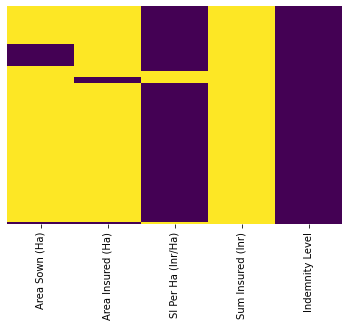

In [27]:
# Check the remaining null_values
df_summary = pd.DataFrame()

for season in ["kharif", "rabi"]:
    for col in ['Area Insured (Ha)', 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)']:
        df_checked = check_null(df_shorten(season)[df_shorten(season)[col].isnull()][cols_insurances])
        df_checked['on_null'] = season +'_'+ col
        df_summary = pd.concat([df_summary, df_checked], axis=0)
            
df_summary

In [28]:
# Print datasets info
for index in merged_filenames:
    print('')
    print(index)
    print('----------')
    df[index].info()
    print('<<=====================>>')


datasets_merged/df_kharif_merged_full.csv
----------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 511242 entries, 0 to 511241
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               511242 non-null  object 
 1   Cluster             511242 non-null  int64  
 2   District            511242 non-null  object 
 3   Sub-District        429814 non-null  object 
 4   Block               365178 non-null  object 
 5   GP                  374588 non-null  object 
 6   Season              511242 non-null  object 
 7   Crop                511242 non-null  object 
 8   Area Sown (Ha)      235991 non-null  float64
 9   Area Insured (Ha)   463017 non-null  float64
 10  SI Per Ha (Inr/Ha)  483684 non-null  float64
 11  Sum Insured (Inr)   490574 non-null  float64
 12  Indemnity Level     511242 non-null  float64
 13  2000 Yield          13682 non-null   float64
 14  2001 Yield          13664 non-

<h5>Chapter 3.2 - Data Imputation for Production yield</h5>
<p>Quoting the next step for the columns from Data Exploratory:
    <i>
        <p>The production data will be used on calculating Threshold Yield and Loss Calculation is only the last 7 years of the given year. Thus, the pre-processing shall <b>exclude the columns that is out of those 7 years range.</b> However, there will be still some missing values after the exclusion of the unused columns.</p>
<p>From the glossary, there are yield columns that are filled with the average of district yield. For these columns, the <b>null-values will be filled by the average of the districts.</b></p>
<p>For the columns with more granular yield details, the treatment can be performed by:
<ul>
    <li>replacing the missing data with Mean/Median/Mode of the column, or</li>
    <li>use regression to predict the missing value</li>
</ul>
Since replacing the missing data with Mean/Median/Mode of the column adds variance and bias, the Mean/Median/Mode of the non-null values will be tested whether it can represent the whole data with 95% confidence. Here the mean value will be used since there are some data points with yield that has been averaged across the District. <b>If the mean pass the test within the 95% confidence level, the null-values shall be filled using the mean</b>. Otherwise, the null-values shall be <b>filled using the regression of the previous years.</b>
    </i>
</p>
<p>Thus, the data imputation will be performed using statistical approach with confidence level of 95% or regression from previous year data sets.</p>

<b><i>3.2.1 - Data Imputation using mean for district group with t-test for equal mean across data point with confidence level of 95%</i></b>

In [29]:
# Define 7 years range for each dataset + 7 years for regression
cols_yield = ['2003 Yield', '2004 Yield', '2005 Yield', '2006 Yield', '2007 Yield', '2008 Yield', '2009 Yield', '2010 Yield', '2011 Yield', '2012 Yield', '2013 Yield', '2014 Yield', '2015 Yield', '2016 Yield', '2017 Yield', '2018 Yield']

<p>From data exploratory, the following findings are observed:
    <ol>
        <li>Knowing that some of the yield data was averaged, the null values on these columns will imputed with the average value of the column if there is only one unique value on the column, i.e. the averaged value.</li>
        <li>If the test indicate that there are minimum difference between the data points extremes and the average, it can be assumed that the missing value lies between the interval, i.e. imputed with mean value. The tests will be performed on District level.</li>
    </ol>
Since the first findings must be included on the second findings, the imputation will be performed based on the second findings

In [ ]:
# Create function to filter dataframe with missing values to impute
def df_to_impute(season, cols_to_check):
    ID_to_impute = []

    for col in cols_to_check:
        df_to_impute = df_shorten(season)[df_shorten(season)[col].isnull()]
        ID_to_impute = ID_to_impute + df_to_impute['ID'].unique().tolist()

    ID_to_impute = set(ID_to_impute)
    df_to_impute = df_shorten(season)[df_shorten(season)['ID'].isin(ID_to_impute)]
    return df_to_impute

In [ ]:
# Create function to define 95% confidence level interval
def interval_threshold(data, confidence_level):
    mean = data.mean()
    stdev = data.std()
    n = len(data)
    t_value = stats.t.ppf(q=1-((1-confidence_level)/2),df=(n-1))
    
    result = {
        'lower': [mean - (t_value*stdev/math.sqrt(n))],
        'upper': [mean + (t_value*stdev/math.sqrt(n))]
    }
    
    return result

In [ ]:
# Get the list of district and columns to be imputed with mean
df_dist_col_to_impute_summary = pd.DataFrame()

for season in ["kharif", "rabi"]:

    # Create list of district to impute and reference dataframe
    list_district = df_to_impute(season, cols_yield)['District_Group'].unique()
    df_reference = df_shorten(season)[df_shorten(season)['District_Group'].isin(list_district)]

    i = 0
    total = len(list_district) * len(cols_yield)

    for district in list_district:
        for col in cols_yield:
            data = df_reference[df_reference['District_Group'] == district][col]
            lower = interval_threshold(data, 0.95)['lower'][0]
            upper = interval_threshold(data, 0.95)['upper'][0]

            # Check if the value extremes are within 95% confidence interval
            if (data.max() <= upper) and (data.min() <= lower) and (data.count() > 0):
                result = {
                    'Season': [season],
                    'District_Group': [district],
                    'Columns': [col]
                }

                df_result = pd.DataFrame(result)
                df_dist_col_to_impute_summary = pd.concat([df_dist_col_to_impute_summary, df_result], axis=0)

In [ ]:
# Impute nan values of listed column and district with district average
df_result_summary = pd.DataFrame()

for season in ["kharif", "rabi"]:

    # Get list of districts and columns to impute
    list_district = df_dist_col_to_impute_summary[(df_dist_col_to_impute_summary['Season'] == season)]['District_Group'].unique()
    list_column = df_dist_col_to_impute_summary[(df_dist_col_to_impute_summary['Season'] == season) & (df_dist_col_to_impute_summary['District_Group'].isin(list_district))]['Columns'].unique()

    # Create trimmed dataframe as a proxy to impute data          
    df_trim = df_shorten(season)[df_shorten(season)['District_Group'].isin(list_district)]

    # Impute missing data on every column that pass the test
    for col in list_column:
        df_trim[col] = df_trim[col].fillna(df_trim.groupby('District_Group')[col].transform('mean'))

    # Substitute imputed district to main dataframe
    df_new = df_shorten(season)
    df_new.drop(df_new[df_new['District_Group'].isin(list_district)].index, inplace=True)
    df_new = pd.concat([df_new, df_trim], axis=0)
    df_new.sort_values(by=['ID'])

    # Get number of key from the main dataframe
    # # the df_shorten function cannot be used to dataframe transformation
    if season == "kharif":
        key = 0
    else:
        key = 1

    df[list(df.keys())[key]] = df_new

                

<i><u>Note</u>: due to long runtime, the following code will be executed on terminal</i>

In [ ]:
# List of file directories
preprocessed_checkpoint_1_filenames = [
    "datasets_preprocessed/df_kharif_preprocessed_checkpoint_1.csv",
    "datasets_preprocessed/df_rabi_preprocessed_checkpoint_1.csv",
]

In [ ]:
# Export csv as checkpoint for further preprocessing
for filename_index in range(len(preprocessed_checkpoint_1_filenames)):
    df[list(df.keys())[filename_index]].to_csv(preprocessed_checkpoint_1_filenames[filename_index], sep=';')